In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [9]:
dataset = pd.read_csv('/content/sample_data/predic_tabel.csv')

In [12]:
print("Informasi dataset:")
print(dataset.info())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB
None


In [13]:
print("\nBeberapa baris pertama dataset:")
print(dataset.head())


Beberapa baris pertama dataset:
   No  Usia Jenis_Kelamin Merokok Bekerja Rumah_Tangga Aktivitas_Begadang  \
0   1   Tua          Pria   Pasif   Tidak           Ya                 Ya   
1   2   Tua          Pria   Aktif   Tidak           Ya                 Ya   
2   3  Muda          Pria   Aktif   Tidak           Ya                 Ya   
3   4   Tua          Pria   Aktif      Ya        Tidak              Tidak   
4   5  Muda        Wanita   Pasif      Ya        Tidak              Tidak   

  Aktivitas_Olahraga Asuransi Penyakit_Bawaan  Hasil  
0             Sering      Ada           Tidak     Ya  
1             Jarang      Ada             Ada  Tidak  
2             Jarang      Ada           Tidak  Tidak  
3             Jarang      Ada             Ada  Tidak  
4             Sering    Tidak             Ada     Ya  


In [19]:
print(dataset.columns)

Index(['No', 'Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 'Rumah_Tangga',
       'Aktivitas_Begadang', 'Aktivitas_Olahraga', 'Asuransi',
       'Penyakit_Bawaan', 'Hasil'],
      dtype='object')


In [23]:
X = dataset.drop('Hasil', axis=1)
y = dataset['Hasil']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom yang memiliki tipe data string
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [37]:
# Normalisasi fitur-fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Decision Tree Accuracy: 0.9088333333333334

Classification Report:
              precision    recall  f1-score   support

       Tidak       0.90      0.92      0.91      3075
          Ya       0.91      0.90      0.91      2925

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



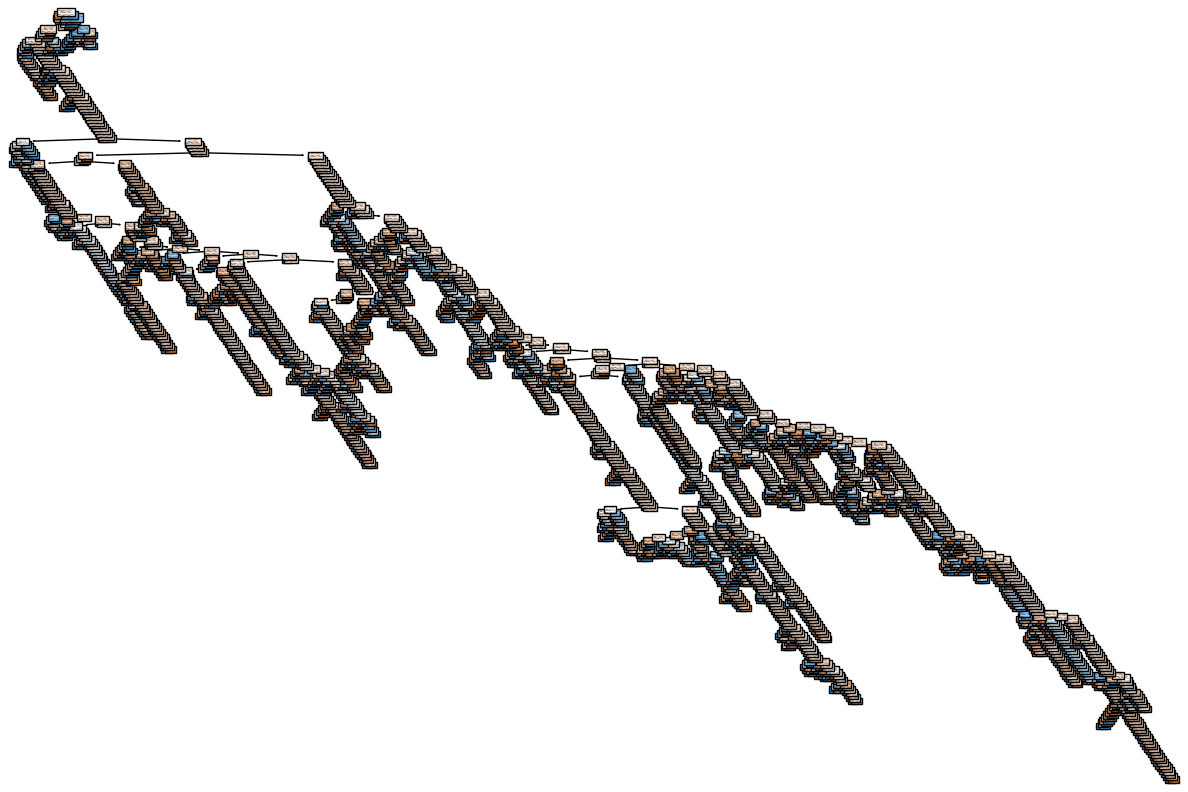

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Membuat model DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

# Melakukan prediksi
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluasi model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Tidak', 'Ya'])
plt.show()


In [40]:
# Melakukan prediksi
y_pred = model.predict(X_test_scaled)

In [41]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9426666666666667

Classification Report:
              precision    recall  f1-score   support

       Tidak       0.90      1.00      0.95      3075
          Ya       1.00      0.88      0.94      2925

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000

